In [1]:
import geopandas as gpd
import rasterio
from rasterize import rasterize_shapes_to_array
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
df_event = gpd.read_file('external_validation_data/chile_fire/EMSR715_AOI01_DEL_PRODUCT_observedEventA_v2/')
df_event.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.147137,"POLYGON ((-71.50879 -33.19332, -71.50874 -33.1..."
1,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.123274,"POLYGON ((-71.49745 -33.19297, -71.49731 -33.1..."
2,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.494222,"POLYGON ((-71.49247 -33.19091, -71.49242 -33.1..."
3,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,1.407952,"POLYGON ((-71.49252 -33.18949, -71.49241 -33.1..."
4,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.041682,"POLYGON ((-71.49458 -33.18949, -71.49453 -33.1..."


<Axes: >

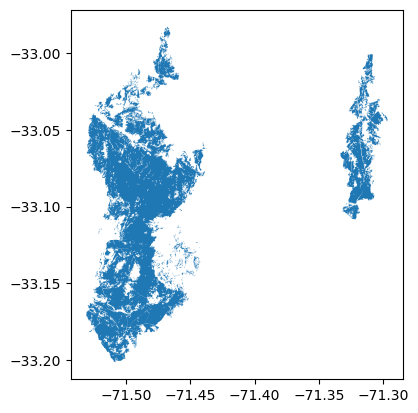

In [4]:
df_event.plot()

In [6]:
ref_path = 'out/chile_fire_2024/rtc_ts_merged/track18/__track18_2023-11-01_merged_VH.tif'
with rasterio.open(ref_path) as ds:
    ref_profile = ds.profile
    ref_crs = ds.crs

In [7]:
df_event_utm = df_event.to_crs(ref_crs)

In [8]:
X_ext = rasterize_shapes_to_array(df_event_utm.geometry.tolist(), np.ones(df_event_utm.shape[0]), ref_profile, all_touched=True, dtype='uint8')

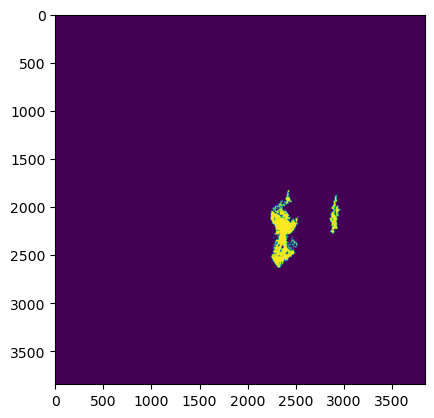

In [9]:
plt.imshow(X_ext)

In [10]:
external_data_prof = ref_profile.copy()
external_data_prof['dtype'] = 'uint8'
external_data_prof['nodata'] = 255

external_data_dir = Path('out/chile_fire_2024/external_data')
external_data_dir.mkdir(exist_ok=True, parents=True)

with rasterio.open(external_data_dir / 'copernicus_fire_map.tif', 'w', **external_data_prof) as ds:
    ds.write(X_ext, 1)
    